In [1]:
# Import dependencies 
from pymongo import MongoClient
from pprint import pprint
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Setup port
mongo = MongoClient(port=27017)

In [3]:
# Check database names
print(mongo.list_database_names())

['admin', 'autosaurus', 'classDB', 'config', 'epa', 'fruits_db', 'local', 'met', 'petsitly_marketing', 'project3', 'project3trend', 'travel_db', 'uk_food']


In [4]:
# Declare database and collection for the full database 
project3 = mongo['project3']
full_data = project3['full_data']

In [5]:
# FULL DATA
results = full_data.find()
results = list(results)

In [6]:
# Transform into DataFrame
full_data_df = pd.DataFrame(results)
full_data_df.head(10)

,_id,Case #,Shooter Last Name,Shooter First Name,Date,Year,City,State,Latitude,Longitude,...,Social Leakage�,Social Leakage How,Social Leakage Who�,Leakage Specific/Nonspecific�,Interest in Past Mass Violence,Relationship with Other Shooting(s),Specify Relationship to Other Shooting(s),Planning,Interest in Firearms,Criminal Sentence
0,642b5a8ac379276388779140,2,Smith,Robert,11/12/66,1966,Mesa,AZ,33.459937,-111.781900,...,0,NA,NA,NA,1,1,Happened a few months after the Charles Whitma...,1,0,1
1,642b5a8ac379276388779141,3,Held,Leo,10/23/67,1967,Lock Haven,PA,41.125184,-77.451878,...,0,NA,NA,NA,0,0,NA,0,1,0
2,642b5a8ac379276388779142,1,Whitman,Charles,8/1/66,1966,Austin,TX,30.286058,-97.739350,...,1,0,0,1,0,1,Robert Smith killed 5 people a few months afte...,1,1,0
3,642b5a8ac379276388779143,4,Pearson,Eric,3/16/68,1968,Ironwood,MI,46.535978,-90.156262,...,0,NA,NA,NA,0,0,NA,0,0,3
4,642b5a8ac379276388779144,5,Lambright,Donald,4/5/69,1969,Harrisburg,PA,40.103677,-75.755056,...,0,NA,NA,NA,0,0,NA,0,0,0
5,642b5a8ac379276388779145,6,White,Joseph,9/23/70,1970,Albany,NY,42.614852,-73.970812,...,0,NA,NA,NA,0,0,NA,0,0,0
6,642b5a8ac379276388779146,7,McLeod,Harvey Glenn,5/29/72,1972,Raleigh,NC,35.837199,-78.642979,...,0,NA,NA,NA,0,0,NA,0,0,0
7,642b5a8ac379276388779147,8,Grace,Edwin,6/21/72,1972,Cherry Hill,NJ,39.927991,-74.994341,...,0,NA,NA,NA,0,0,NA,0,0,0
8,642b5a8ac379276388779148,9,Essex,Mark,1/7/73,1973,New Orleans�,LA,30.002426,-90.038906,...,1,"1, 1","9, 1","1, 0",0,0,NA,1,0,0
9,642b5a8ac379276388779149,10,Sander,Robert,3/2/75,1975,Smith River,CA,41.949285,-124.199492,...,0,NA,NA,NA,0,0,NA,0,0,0


In [7]:
# Find column names
full_data_df.columns

Index(['_id', 'Case #', 'Shooter Last Name', 'Shooter First Name', 'Date',
       'Year', 'City', 'State', 'Latitude', 'Longitude', 'Killed', 'Injured',
       'Perpetrator Age', 'Perpetrator Gender', 'Location',
       'Total Firearms Brought to the Scene', 'Make and Model',
       'Urban/Suburban/Rural', 'Perpetrator Race', 'Military Service',
       'Military Branch', 'Perpetrator Known to Police or FBI',
       'Perpetrator Criminal Record', 'Perpetrator Part I Crimes',
       'Perpetrator Part II Crimes', 'Recent or Ongoing Stressor',
       'Signs of Being in Crisis', 'Timeline of Signs of Crisis',
       'Signs of Crisis Expanded', 'Inability to Perform Daily Tasks',
       'Notably Depressed Mood', 'Unusually Calm or Happy',
       'Rapid Mood Swings', 'Increased Agitation', 'Abusive Behavior',
       'Isolation', 'Losing Touch with Reality', 'Paranoia', 'Suicidality',
       'Prior Hospitalization', 'Voluntary or Involuntary Hospitalization',
       'Prior Counseling', 'Volunt

In [8]:
# Pair down to only relevant columns
full_data_df = full_data_df[['Case #', 'Shooter Last Name', 'Shooter First Name', 'Date', 'Year',
       'City', 'State','Killed', 'Injured',
       'Perpetrator Age', 'Perpetrator Gender', 'Location',
       'Total Firearms Brought to the Scene', 'Make and Model',
       'Perpetrator Race', 'Perpetrator Known to Police or FBI',
       'Perpetrator Criminal Record', 'Perpetrator Part I Crimes',
       'Perpetrator Part II Crimes', 'Mental Illness','Social Media Use�',
       'Social Leakage�','Interest in Past Mass Violence',
       'Relationship with Other Shooting(s)',
       'Specify Relationship to Other Shooting(s)']]

In [9]:
# Check data
full_data_df.head()

,Case #,Shooter Last Name,Shooter First Name,Date,Year,City,State,Killed,Injured,Perpetrator Age,...,Perpetrator Known to Police or FBI,Perpetrator Criminal Record,Perpetrator Part I Crimes,Perpetrator Part II Crimes,Mental Illness,Social Media Use�,Social Leakage�,Interest in Past Mass Violence,Relationship with Other Shooting(s),Specify Relationship to Other Shooting(s)
0,2,Smith,Robert,11/12/66,1966,Mesa,AZ,5,2,18,...,0,0,0,0,2,2,0,1,1,Happened a few months after the Charles Whitma...
1,3,Held,Leo,10/23/67,1967,Lock Haven,PA,6,6,39,...,1,0,0,1,4,2,0,0,0,NA
2,1,Whitman,Charles,8/1/66,1966,Austin,TX,15,31,25,...,0,1,0,9,1,2,1,0,1,Robert Smith killed 5 people a few months afte...
3,4,Pearson,Eric,3/16/68,1968,Ironwood,MI,7,2,56,...,0,0,0,0,0,2,0,0,0,NA
4,5,Lambright,Donald,4/5/69,1969,Harrisburg,PA,4,17,31,...,0,0,0,0,2,2,0,0,0,NA


In [10]:
# Get data types
full_data_df.dtypes

Case #                                       object
Shooter Last Name                            object
Shooter First Name                           object
Date                                         object
Year                                          int64
City                                         object
State                                        object
Killed                                        int64
Injured                                       int64
Perpetrator Age                              object
Perpetrator Gender                           object
Location                                      int64
Total Firearms Brought to the Scene          object
Make and Model                               object
Perpetrator Race                             object
Perpetrator Known to Police or FBI           object
Perpetrator Criminal Record                  object
Perpetrator Part I Crimes                    object
Perpetrator Part II Crimes                   object
Mental Illne

In [11]:
# Change age to float
full_data_df['Perpetrator Age'] = pd.to_numeric(full_data_df['Perpetrator Age'], errors='coerce')

In [12]:
# Get data types
full_data_df.dtypes

Case #                                        object
Shooter Last Name                             object
Shooter First Name                            object
Date                                          object
Year                                           int64
City                                          object
State                                         object
Killed                                         int64
Injured                                        int64
Perpetrator Age                              float64
Perpetrator Gender                            object
Location                                       int64
Total Firearms Brought to the Scene           object
Make and Model                                object
Perpetrator Race                              object
Perpetrator Known to Police or FBI            object
Perpetrator Criminal Record                   object
Perpetrator Part I Crimes                     object
Perpetrator Part II Crimes                    

In [13]:
full_data_df = full_data_df.dropna()

In [14]:
full_data_df['Perpetrator Age'].max()

70.0

In [15]:
bins = [0, 19.9, 29.9, 39.9, 49.9, 59.9, 69.9, 79.9]

group_names = ["Under 20", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79"]

In [16]:
full_data_df['Perpetrator Age'] = pd.cut(full_data_df['Perpetrator Age'], bins, labels=group_names, include_lowest=True)
full_data_df.head()

,Case #,Shooter Last Name,Shooter First Name,Date,Year,City,State,Killed,Injured,Perpetrator Age,...,Perpetrator Known to Police or FBI,Perpetrator Criminal Record,Perpetrator Part I Crimes,Perpetrator Part II Crimes,Mental Illness,Social Media Use�,Social Leakage�,Interest in Past Mass Violence,Relationship with Other Shooting(s),Specify Relationship to Other Shooting(s)
0,2,Smith,Robert,11/12/66,1966,Mesa,AZ,5,2,Under 20,...,0,0,0,0,2,2,0,1,1,Happened a few months after the Charles Whitma...
1,3,Held,Leo,10/23/67,1967,Lock Haven,PA,6,6,30-39,...,1,0,0,1,4,2,0,0,0,NA
2,1,Whitman,Charles,8/1/66,1966,Austin,TX,15,31,20-29,...,0,1,0,9,1,2,1,0,1,Robert Smith killed 5 people a few months afte...
3,4,Pearson,Eric,3/16/68,1968,Ironwood,MI,7,2,50-59,...,0,0,0,0,0,2,0,0,0,NA
4,5,Lambright,Donald,4/5/69,1969,Harrisburg,PA,4,17,30-39,...,0,0,0,0,2,2,0,0,0,NA


In [17]:
full_data_df['Year'].unique()

array([1966, 1967, 1968, 1969, 1970, 1972, 1973, 1975, 1976, 1977, 1978,
       1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2003, 2004, 2005, 2002, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])

In [18]:
bins2 = [0, 1970, 1980, 1990, 2000, 2010, 2020, 2023]

group_names2 = ["1960s", "1970s", "1980s", "1990s", "2000s", "2010s", "2020 to 2022"]

In [19]:
full_data_df['Year'] = pd.cut(full_data_df['Year'], bins2, labels=group_names2, include_lowest=True)
full_data_df.head()

,Case #,Shooter Last Name,Shooter First Name,Date,Year,City,State,Killed,Injured,Perpetrator Age,...,Perpetrator Known to Police or FBI,Perpetrator Criminal Record,Perpetrator Part I Crimes,Perpetrator Part II Crimes,Mental Illness,Social Media Use�,Social Leakage�,Interest in Past Mass Violence,Relationship with Other Shooting(s),Specify Relationship to Other Shooting(s)
0,2,Smith,Robert,11/12/66,1960s,Mesa,AZ,5,2,Under 20,...,0,0,0,0,2,2,0,1,1,Happened a few months after the Charles Whitma...
1,3,Held,Leo,10/23/67,1960s,Lock Haven,PA,6,6,30-39,...,1,0,0,1,4,2,0,0,0,NA
2,1,Whitman,Charles,8/1/66,1960s,Austin,TX,15,31,20-29,...,0,1,0,9,1,2,1,0,1,Robert Smith killed 5 people a few months afte...
3,4,Pearson,Eric,3/16/68,1960s,Ironwood,MI,7,2,50-59,...,0,0,0,0,0,2,0,0,0,NA
4,5,Lambright,Donald,4/5/69,1960s,Harrisburg,PA,4,17,30-39,...,0,0,0,0,2,2,0,0,0,NA


In [20]:
df_under20 = full_data_df.loc[full_data_df['Perpetrator Age'] == 'Under 20']
df_20_29 = full_data_df.loc[full_data_df['Perpetrator Age'] == "20-29"]
df_30_39 = full_data_df.loc[full_data_df['Perpetrator Age'] == "30-39"]
df_40_49 = full_data_df.loc[full_data_df['Perpetrator Age'] == "40-49"]
df_50_59 = full_data_df.loc[full_data_df['Perpetrator Age'] == "50-59"]
df_60_69 = full_data_df.loc[full_data_df['Perpetrator Age'] == "60-69"]
df_70_79 = full_data_df.loc[full_data_df['Perpetrator Age'] == "70-79"]

In [21]:
count_under20 = df_under20.groupby('Year').count()['Case #']
count_20_29 = df_20_29.groupby('Year').count()['Case #']
count_30_39 = df_30_39.groupby('Year').count()['Case #']
count_40_49 = df_40_49.groupby('Year').count()['Case #']
count_50_59 = df_50_59.groupby('Year').count()['Case #']
count_60_69 = df_60_69.groupby('Year').count()['Case #']
count_70_79 = df_70_79.groupby('Year').count()['Case #']

In [22]:
years = full_data_df['Year'].unique()
years

['1960s', '1970s', '1980s', '1990s', '2000s', '2010s', '2020 to 2022']
Categories (7, object): ['1960s' < '1970s' < '1980s' < '1990s' < '2000s' < '2010s' < '2020 to 2022']

In [23]:
data = {'Under 20': count_under20, 
       '20 to 29': count_20_29,
       '30 to 39': count_30_39,
       '40 to 49': count_40_49,
       '50 to 59': count_50_59,
       '60 to 69': count_60_69,
       '70 to 79': count_70_79}
age_count_df = pd.DataFrame(data)
age_count_df.head()

,Under 20,20 to 29,30 to 39,40 to 49,50 to 59,60 to 69,70 to 79
Year,,,,,,,
1960s,1,2,2,0,1,0,0
1970s,0,7,3,2,0,0,0
1980s,0,5,6,7,1,1,1
1990s,8,10,9,10,3,1,0
2000s,3,14,9,7,5,1,0


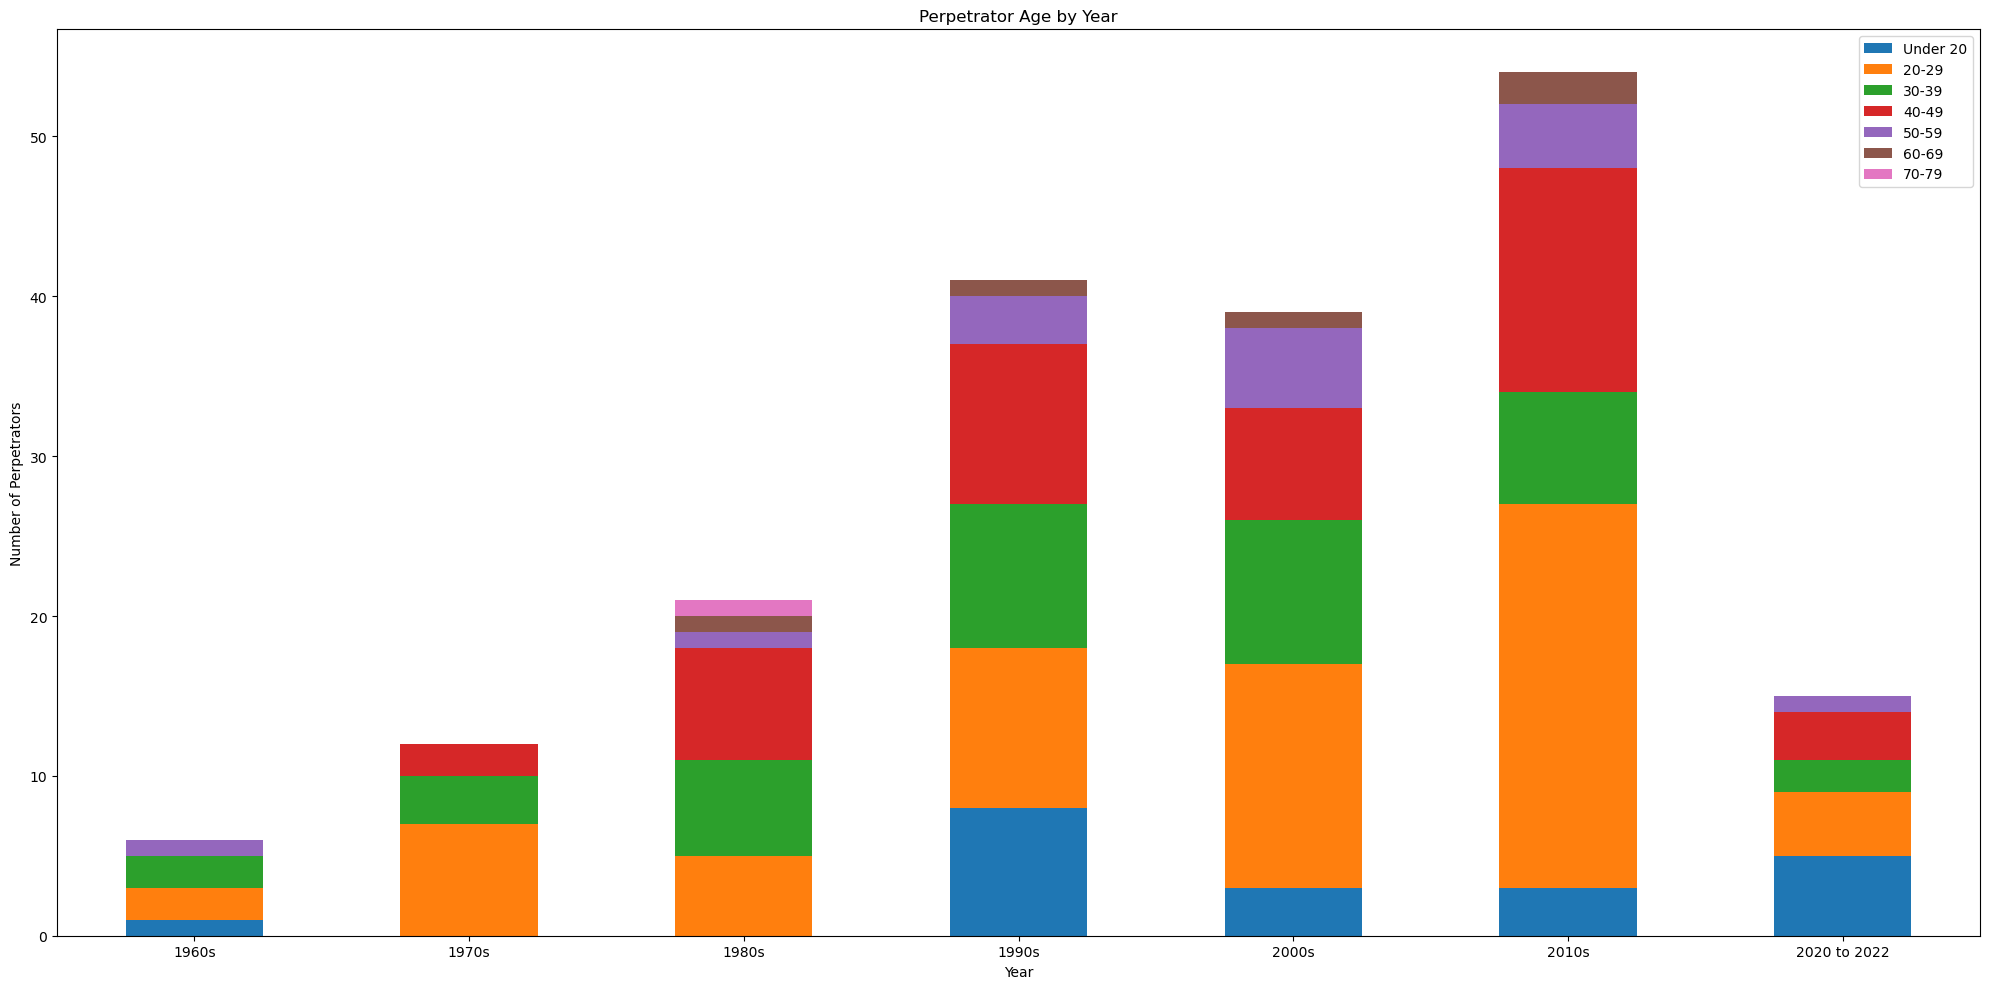

In [37]:
age_count_df.plot.bar(stacked=True, figsize = (20, 10))
plt.legend(labels = group_names)
plt.xlabel("Year")
plt.ylabel("Number of Perpetrators")
plt.title("Perpetrator Age by Year")
plt.xticks(rotation='horizontal')
plt.tight_layout()
plt.savefig('images/perps_by_year.png')

In [38]:
gender_under20 = df_under20.groupby('Perpetrator Gender').count()['Case #']
gender_20_29 = df_20_29.groupby('Perpetrator Gender').count()['Case #']
gender_30_39 = df_30_39.groupby('Perpetrator Gender').count()['Case #']
gender_40_49 = df_40_49.groupby('Perpetrator Gender').count()['Case #']
gender_50_59 = df_50_59.groupby('Perpetrator Gender').count()['Case #']
gender_60_69 = df_60_69.groupby('Perpetrator Gender').count()['Case #']
gender_70_79 = df_70_79.groupby('Perpetrator Gender').count()['Case #']

In [39]:
data2 = {'Under 20': gender_under20, 
       '20 to 29': gender_20_29,
       '30 to 39': gender_30_39,
       '40 to 49': gender_40_49,
       '50 to 59': gender_50_59,
       '60 to 69': gender_60_69,
       '70 to 79': gender_70_79}
gender_count_df = pd.DataFrame(data2)
gender_count_df.head()

,Under 20,20 to 29,30 to 39,40 to 49,50 to 59,60 to 69,70 to 79
Perpetrator Gender,,,,,,,
0,20.0,64,38.0,41.0,14.0,5.0,1.0
1,NaN,1,NaN,2.0,1.0,NaN,NaN
3,NaN,1,NaN,NaN,NaN,NaN,NaN


In [41]:
gender_names = ["Male", "Female", "Nonbinary"]

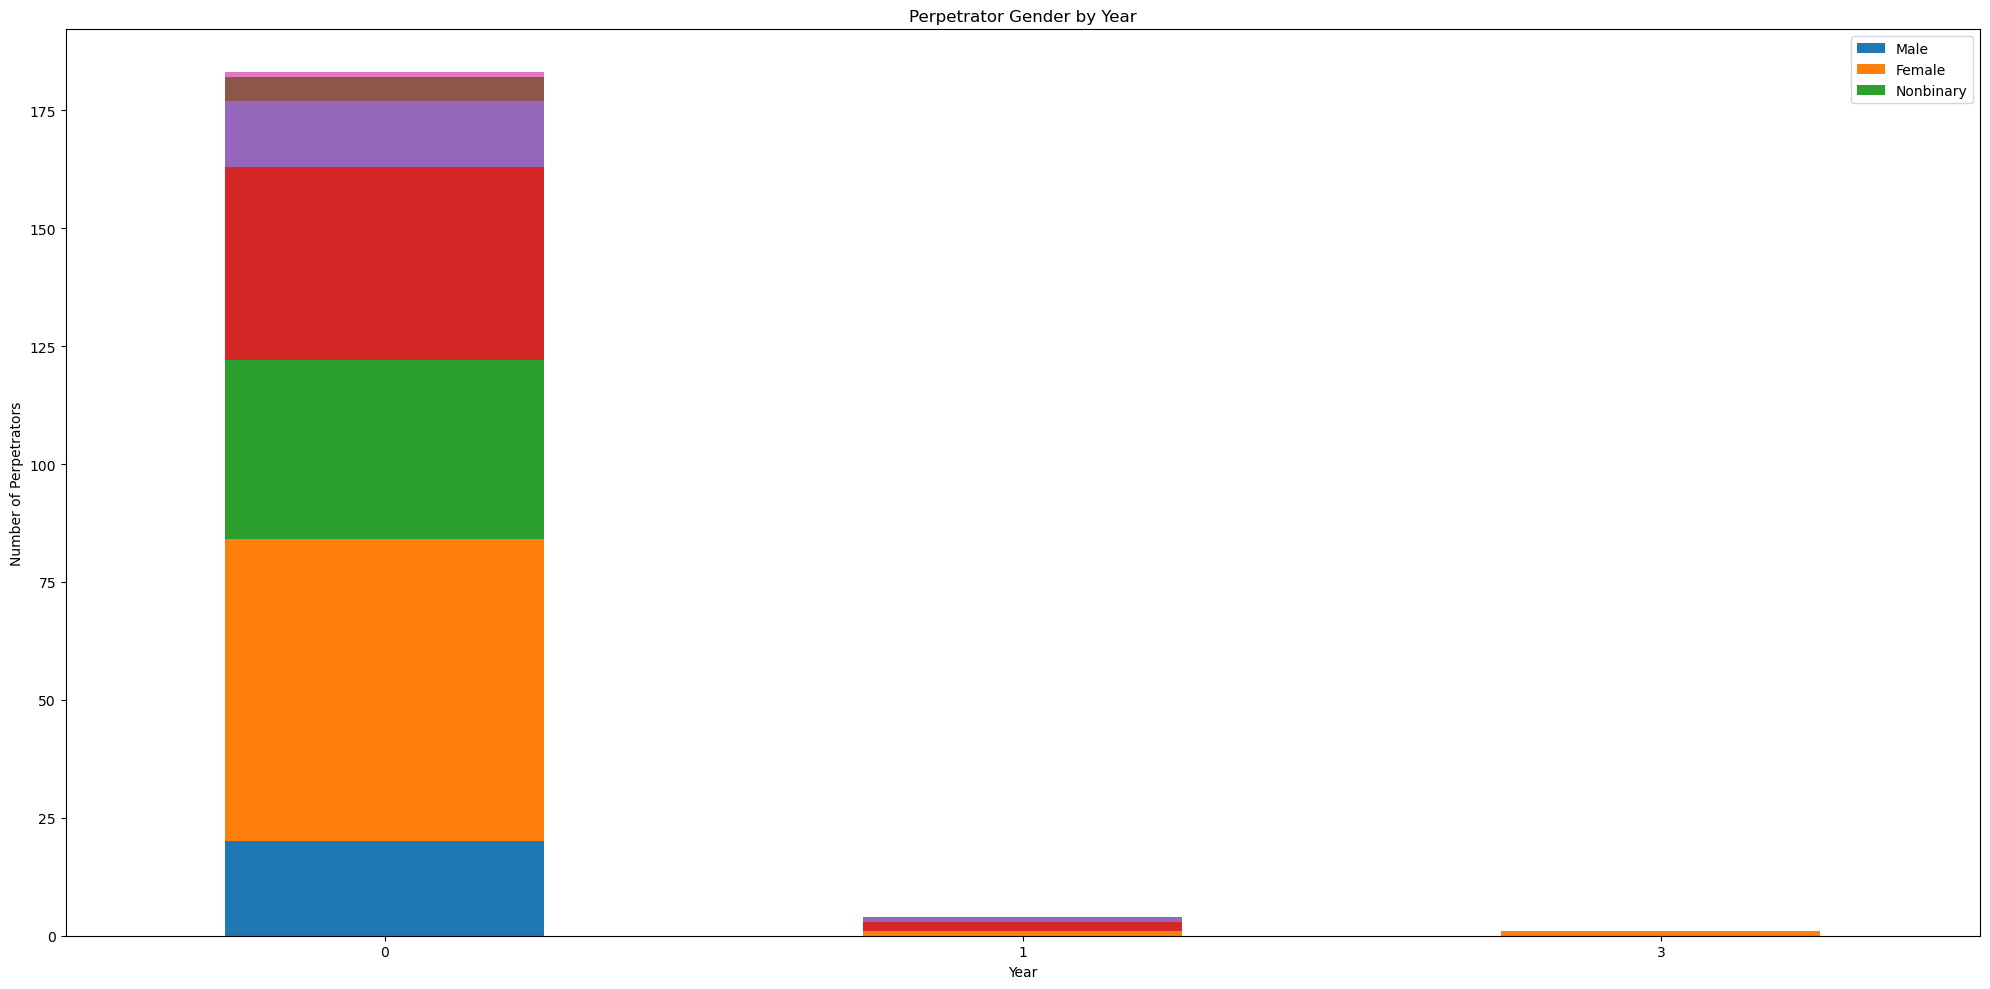

In [42]:
gender_count_df.plot.bar(stacked=True, figsize = (20, 10))
plt.legend(labels = gender_names)
plt.xlabel("Year")
plt.ylabel("Number of Perpetrators")
plt.title("Perpetrator Gender by Year")
plt.xticks(rotation='horizontal')
plt.tight_layout()
plt.savefig('images/gender_by_year.png')

In [25]:
gender_counts = full_data_df['Perpetrator Gender'].value_counts()
gender_counts

0    183
1      4
3      1
Name: Perpetrator Gender, dtype: int64

In [26]:
gender_df = pd.DataFrame(gender_counts)
gender_df

,Perpetrator Gender
0,183
1,4
3,1


In [27]:
gender_df.insert(1, "Gender", ["Male", "Female", "Nonbinary"], True)
gender_df

,Perpetrator Gender,Gender
0,183,Male
1,4,Female
3,1,Nonbinary


In [28]:
gender_df.reset_index(drop=True)
gender_df

,Perpetrator Gender,Gender
0,183,Male
1,4,Female
3,1,Nonbinary


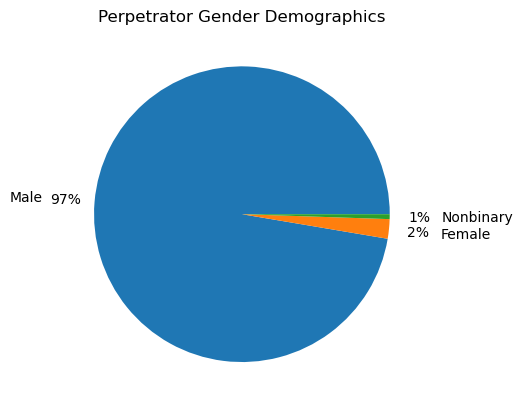

In [29]:
plt.pie(gender_df['Perpetrator Gender'], labels=gender_df['Gender'], 
        autopct='%1.0f%%', pctdistance=1.2, labeldistance=1.35)
plt.title("Perpetrator Gender Demographics")
plt.show()


In [30]:
# TREND DATA
# Declare database and collection for the trend data
project3trend = mongo['project3trend']
trend_data = project3trend['trend_data']

In [31]:
trend_results = trend_data.find()
trend_results = list(trend_results)

In [32]:
# Transform into DataFrame
trend_data_df = pd.DataFrame(trend_results)
trend_data_df.head(10)

,_id,Year,US Population (Census),Total US Murders (FBI UCR),US Murder Rate per Million,Mass Shootings (Incidents),Mass Shooting Rate Per Million,Mass Shooting Yearly Growth Rate (Incidents),Mass Shooting 3 Year Average (Incidents),Mass Shooting 5 Year Average (Incidents),Mass Shooting 10 Year Average (Incidents),Mass Shooting Deaths (Total),Deaths per Mass Shooting (Mean),Mass Shooting Death Rate per Million,Mass Shooting 3 Year Average (Deaths),Mass Shooting 5 Year Average (Deaths),Mass Shooting 10 Year Average (Deaths)
0,642b6abb425f4db5bd2d28e3,1969,"202,676,946","14,760",72.825254,1,0.004934,2.18,1,,,4,4,0.019736,5.666667,,
1,642b6abb425f4db5bd2d28e4,1971,"207,660,677","17,780",85.620447,,0,2.31,1,1,,,,0,4,5.25,
2,642b6abb425f4db5bd2d28e5,1972,"209,896,021","18,670",88.948804,2,0.009529,2.38,1.5,1.25,,10,5,0.047643,7,6.25,
3,642b6abb425f4db5bd2d28e6,1973,"211,908,788","19,640",92.681385,1,0.004719,2.45,1.5,1.25,,7,7,0.033033,8.5,6.25,
4,642b6abb425f4db5bd2d28e7,1974,"213,853,928","20,710",96.841803,,0,2.52,1.5,1.333333,,,,0,8.5,7,
5,642b6abb425f4db5bd2d28e8,1968,"200,706,052","13,800",68.757269,1,0.004982,2.12,1.333333,,,7,7,0.034877,11,,
6,642b6abb425f4db5bd2d28e9,1970,"205,052,174","16,000",78.028922,1,0.004877,2.25,1,1.2,,4,4,0.019507,5,8.2,
7,642b6abb425f4db5bd2d28ea,1966,"196,560,338","11,040",56.16596,2,0.010175,2,,,,20,10,0.10175,,,
8,642b6abb425f4db5bd2d28eb,1980,"227,224,681","23,040",101.397436,3,0.013203,3,2,2,1.714286,14,4.666667,0.061613,9.5,10.75,9.285714
9,642b6abb425f4db5bd2d28ec,1981,"229,465,714","22,520",98.141023,2,0.008716,3.09,2.5,2.25,1.75,9,4.5,0.039222,11.5,11.25,9.25


In [33]:
# Find column names
trend_data_df.columns

Index(['_id', 'Year', 'US Population (Census)', 'Total US Murders (FBI UCR)',
       'US Murder Rate per Million', 'Mass Shootings (Incidents)',
       'Mass Shooting Rate Per Million',
       'Mass Shooting Yearly Growth Rate (Incidents)',
       'Mass Shooting 3 Year Average (Incidents)',
       'Mass Shooting 5 Year Average (Incidents)',
       'Mass Shooting 10 Year Average (Incidents)',
       'Mass Shooting Deaths (Total)', 'Deaths per Mass Shooting (Mean)',
       'Mass Shooting Death Rate per Million',
       'Mass Shooting 3 Year Average (Deaths)',
       'Mass Shooting 5 Year Average (Deaths)',
       'Mass Shooting 10 Year Average (Deaths)'],
      dtype='object')

In [34]:
# Pair down to only relevant columns
trend_data_df = trend_data_df[['Year', 'US Population (Census)', 'Total US Murders (FBI UCR)',
       'US Murder Rate per Million', 'Mass Shootings (Incidents)',
       'Mass Shooting Rate Per Million',
       'Mass Shooting Yearly Growth Rate (Incidents)',
       'Mass Shooting 3 Year Average (Incidents)',
       'Mass Shooting 5 Year Average (Incidents)',
       'Mass Shooting 10 Year Average (Incidents)',
       'Mass Shooting Deaths (Total)', 'Deaths per Mass Shooting (Mean)',
       'Mass Shooting Death Rate per Million',
       'Mass Shooting 3 Year Average (Deaths)',
       'Mass Shooting 5 Year Average (Deaths)',
       'Mass Shooting 10 Year Average (Deaths)']]

In [35]:
# Check data
trend_data_df.head()

,Year,US Population (Census),Total US Murders (FBI UCR),US Murder Rate per Million,Mass Shootings (Incidents),Mass Shooting Rate Per Million,Mass Shooting Yearly Growth Rate (Incidents),Mass Shooting 3 Year Average (Incidents),Mass Shooting 5 Year Average (Incidents),Mass Shooting 10 Year Average (Incidents),Mass Shooting Deaths (Total),Deaths per Mass Shooting (Mean),Mass Shooting Death Rate per Million,Mass Shooting 3 Year Average (Deaths),Mass Shooting 5 Year Average (Deaths),Mass Shooting 10 Year Average (Deaths)
0,1969,"202,676,946","14,760",72.825254,1,0.004934,2.18,1,,,4,4,0.019736,5.666667,,
1,1971,"207,660,677","17,780",85.620447,,0,2.31,1,1,,,,0,4,5.25,
2,1972,"209,896,021","18,670",88.948804,2,0.009529,2.38,1.5,1.25,,10,5,0.047643,7,6.25,
3,1973,"211,908,788","19,640",92.681385,1,0.004719,2.45,1.5,1.25,,7,7,0.033033,8.5,6.25,
4,1974,"213,853,928","20,710",96.841803,,0,2.52,1.5,1.333333,,,,0,8.5,7,
